In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el archivo CSV y realizar las transformaciones necesarias
data = pd.read_csv('../data/base/DatospreciosFACUA_2024-10-26.csv')
data['Día'] = pd.to_datetime(data['Día'], format='%d/%m/%Y')
data['Precio (€)'] = data['Precio (€)'].str.replace(',', '.').astype(float)

In [3]:
# Palabras clave y categorías
palabras_clave = {
    'aceite de girasol': 'Aceite de girasol',
    'aceite de oliva intenso': 'Aceite De Oliva Intenso',
    'aceite de oliva suave': 'Aceite De Oliva Suave',
    'aceite de oliva virgen': 'Aceite De Oliva Virgen',
    'virgen extra': 'Aceite de oliva virgen extra',
    'sin lactosa': 'Leche Sin Lactosa',
}

# Función para asignar categorías basadas en palabras clave
def asignar_categoria(texto):
    for palabra, categoria in palabras_clave.items():
        if palabra in texto.lower():  # Convierte a minúsculas para evitar problemas de mayúsculas/minúsculas
            return categoria
    return 'Leche'  # Asigna 'Otros' si no se encuentra ninguna palabra clave

# Crear la nueva columna 'categoria' usando la función
data['categoria'] = data['Nombre'].apply(asignar_categoria)

In [4]:
data['Tipo producto']=data['categoria']
data=data.drop(columns='categoria')

AttributeError: Rectangle.set() got an unexpected keyword argument 'palette'

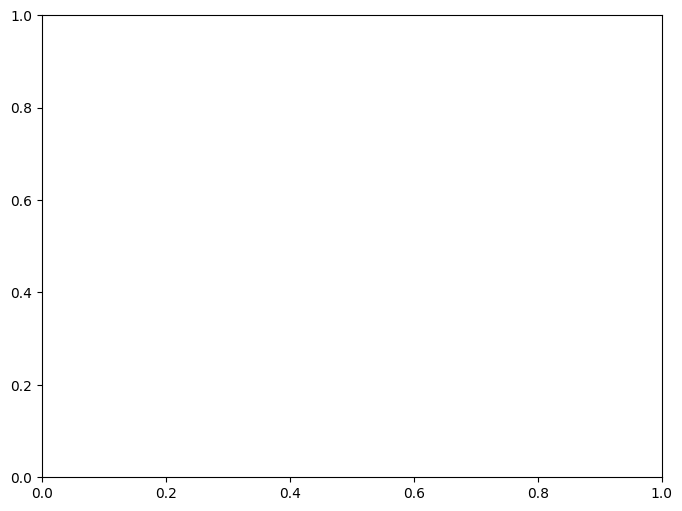

In [15]:
# 1. Comparación de precios promedio entre diferentes supermercados
promedio_precio_supermercado = data.groupby('Supermercado')['Precio (€)'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
promedio_precio_supermercado.plot(kind='bar', palette='hsv')
plt.xlabel('Supermercado')
plt.ylabel('Precio Promedio (€)')
plt.title('Comparación de Precios Promedio entre Supermercados')
plt.show()


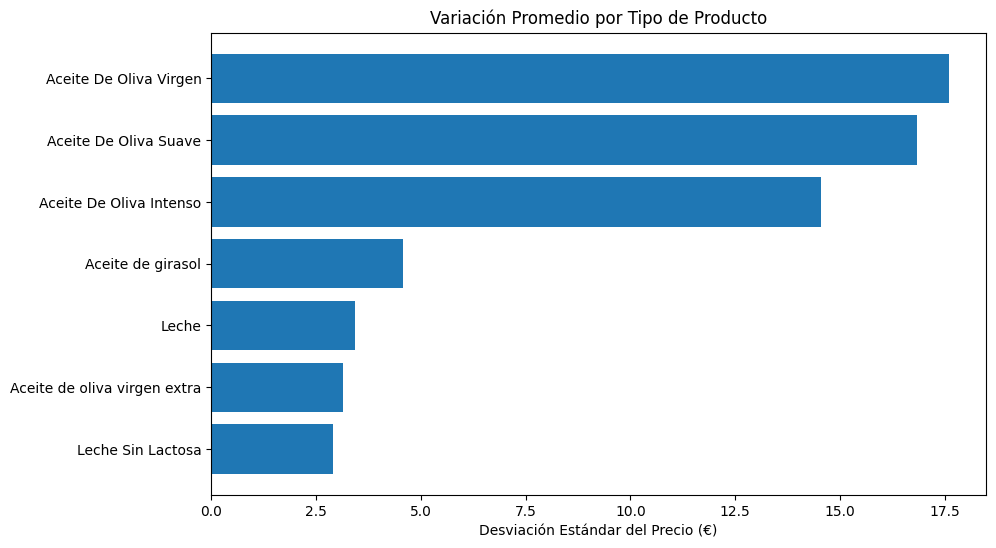

In [6]:
# 2. Promedio de variación por tipo de producto
variacion_promedio_tipo = data.groupby('Tipo producto')['Precio (€)'].std().reset_index().sort_values(by='Precio (€)', ascending=False)
variacion_promedio_tipo.columns = ['Tipo producto', 'Desviación Estándar del Precio']
plt.figure(figsize=(10, 6))
plt.barh(variacion_promedio_tipo['Tipo producto'], variacion_promedio_tipo['Desviación Estándar del Precio'])
plt.xlabel('Desviación Estándar del Precio (€)')
plt.title('Variación Promedio por Tipo de Producto')
plt.gca().invert_yaxis()
plt.show()


<Figure size 1000x600 with 0 Axes>

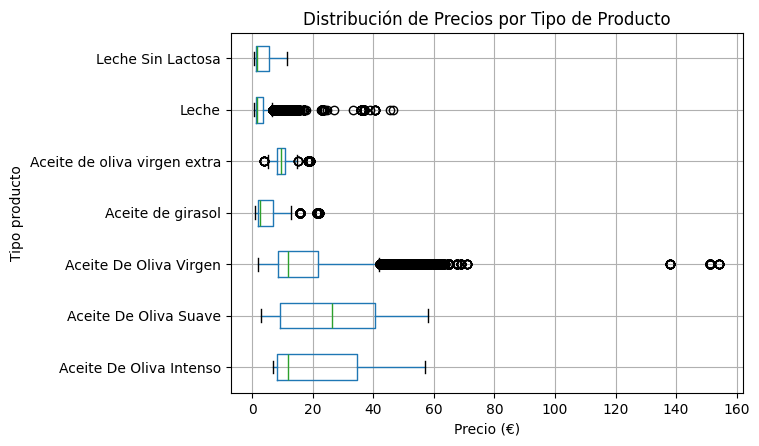

In [7]:
# 3. Distribución de precios por tipo de producto
plt.figure(figsize=(10, 6))
data.boxplot(column='Precio (€)', by='Tipo producto', vert=False)
plt.xlabel('Precio (€)')
plt.title('Distribución de Precios por Tipo de Producto')
plt.suptitle('')  # Eliminar el título general que genera boxplot
plt.show()


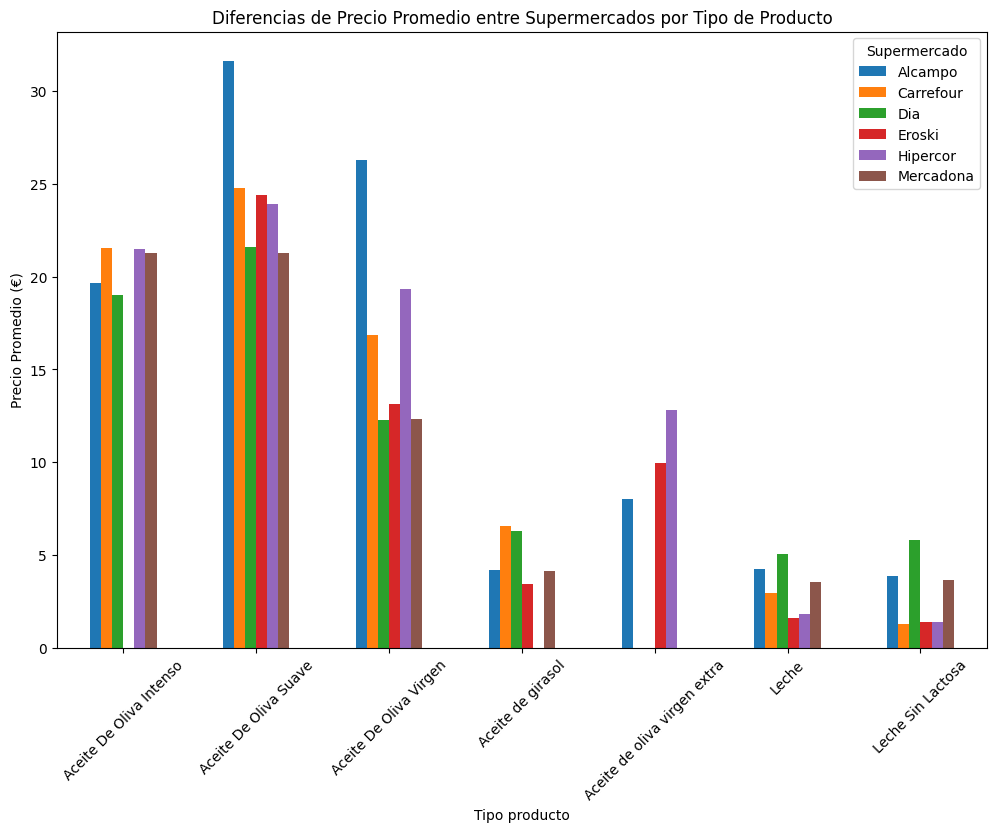

In [8]:
# 4. Diferencias de precio promedio entre productos similares en distintos supermercados
precio_producto_supermercado = data.groupby(['Tipo producto', 'Supermercado'])['Precio (€)'].mean().unstack()
precio_producto_supermercado.plot(kind='bar', figsize=(12, 8))
plt.ylabel('Precio Promedio (€)')
plt.title('Diferencias de Precio Promedio entre Supermercados por Tipo de Producto')
plt.xticks(rotation=45)
plt.show()

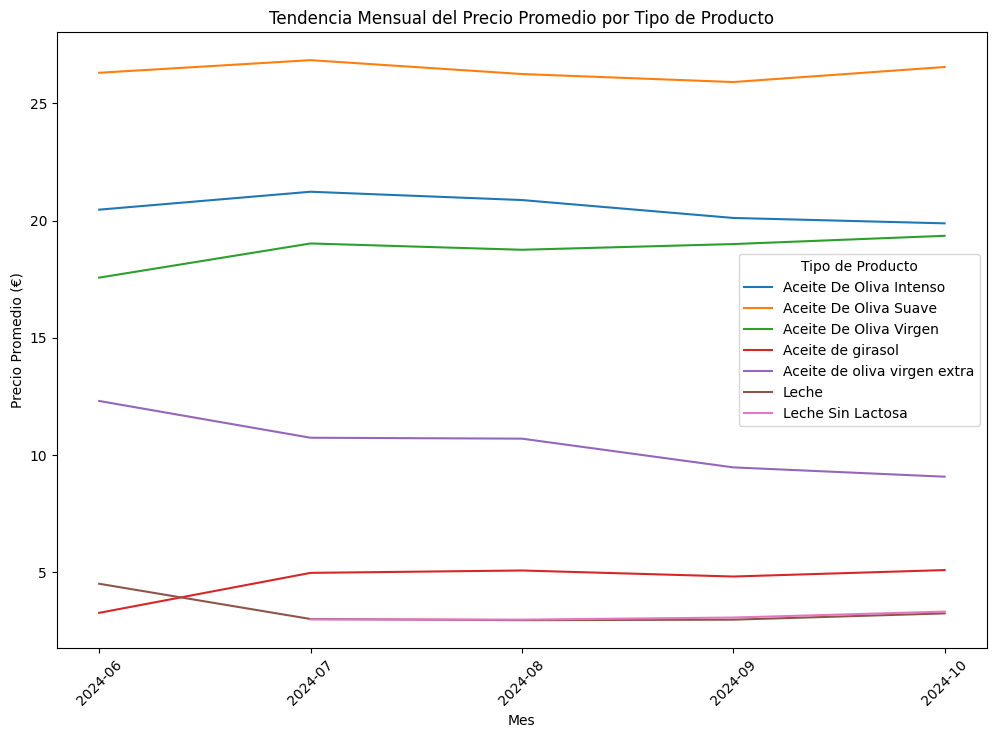

In [9]:
# 5. Tendencia Mensual del Precio Promedio por Tipo de Producto
# Agregar una columna de mes y calcular el promedio de precios por mes y tipo de producto
data['Mes'] = data['Día'].dt.to_period('M')
promedio_mensual_tipo = data.groupby(['Mes', 'Tipo producto'])['Precio (€)'].mean().reset_index()

# Crear un gráfico de líneas para cada tipo de producto
plt.figure(figsize=(12, 8))
for tipo in promedio_mensual_tipo['Tipo producto'].unique():
    datos_tipo = promedio_mensual_tipo[promedio_mensual_tipo['Tipo producto'] == tipo]
    plt.plot(datos_tipo['Mes'].astype(str), datos_tipo['Precio (€)'], label=tipo)

plt.xlabel('Mes')
plt.ylabel('Precio Promedio (€)')
plt.title('Tendencia Mensual del Precio Promedio por Tipo de Producto')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Producto')
plt.show()


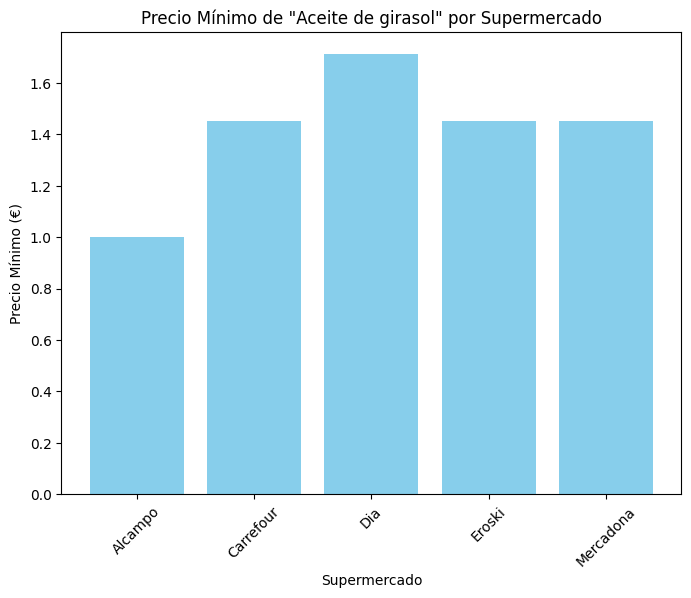

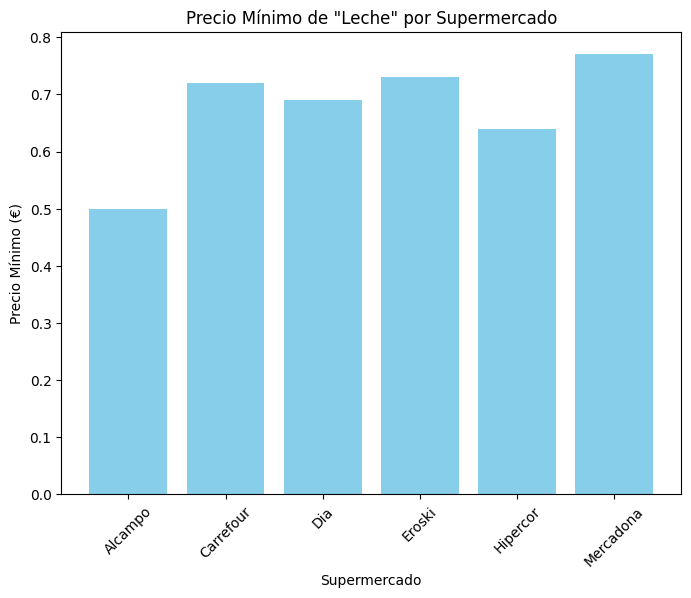

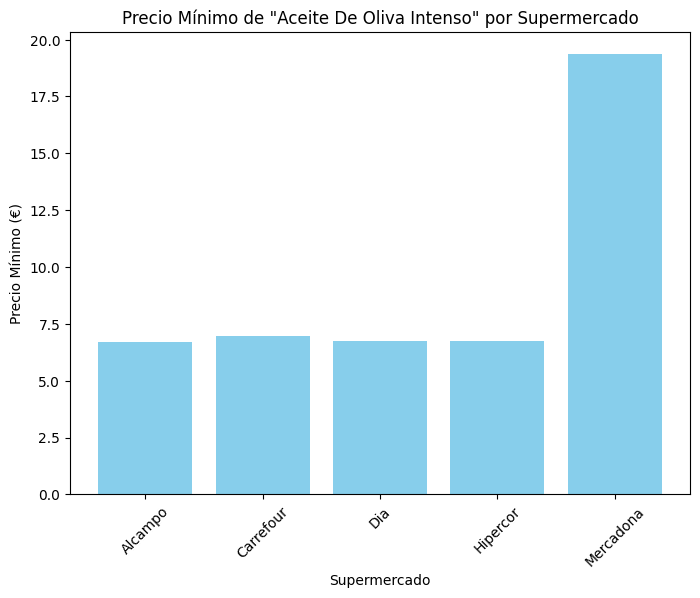

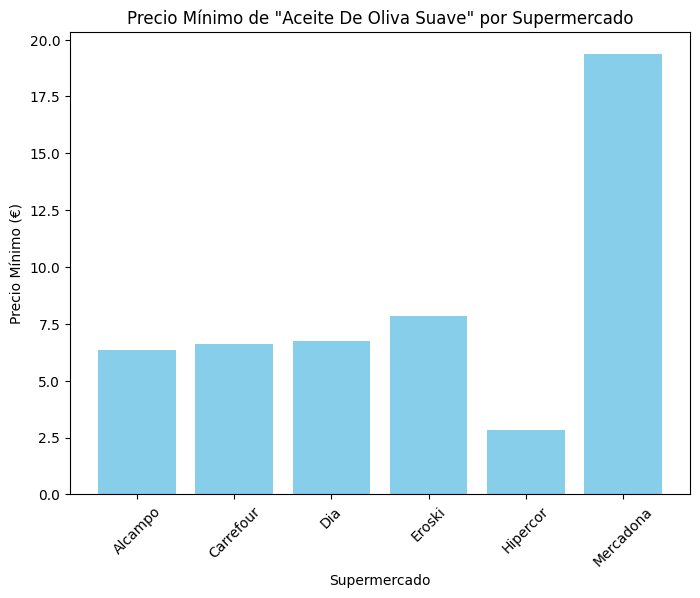

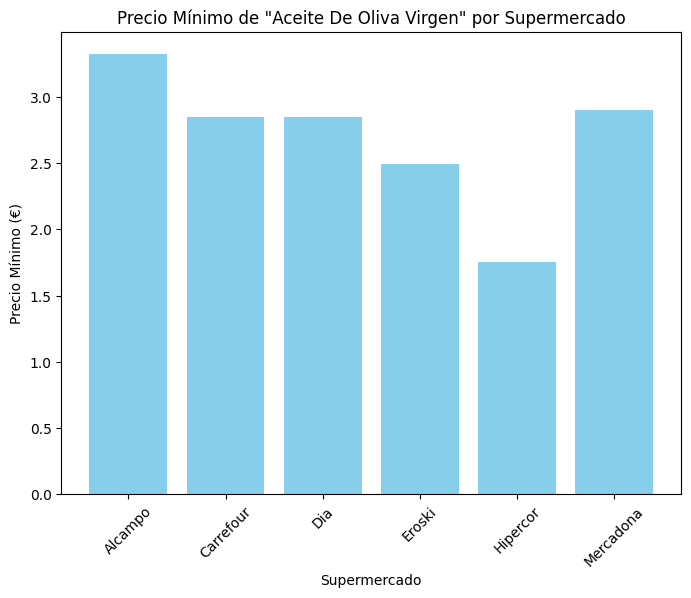

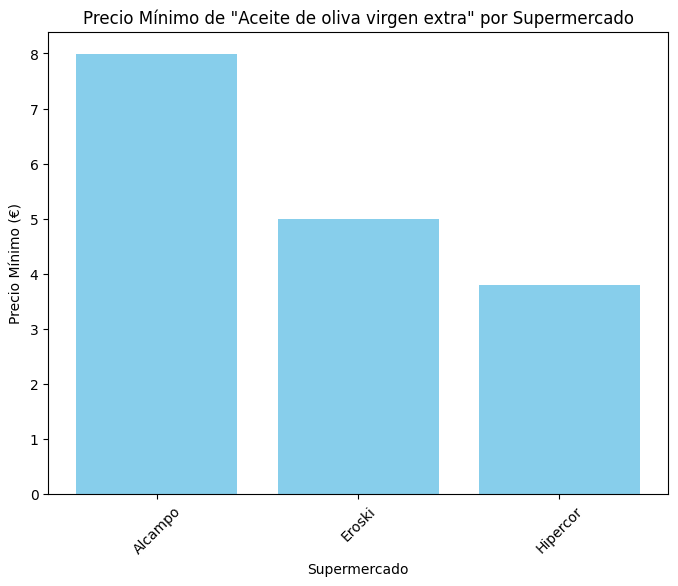

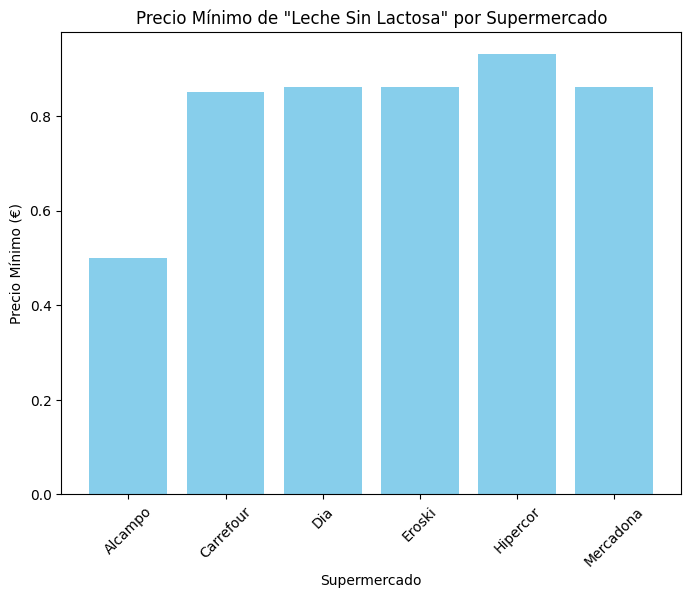

In [10]:
# 6. Precios minimos por supermercado
precio_minimo_tipo_supermercado = data.groupby(['Tipo producto', 'Supermercado'])['Precio (€)'].min().reset_index()
precio_minimo_tipo_supermercado.columns = ['Tipo producto', 'Supermercado', 'Precio Mínimo']

# Lista de tipos de producto únicos en los datos
tipos_producto = data['Tipo producto'].unique()

# Crear un gráfico para cada tipo de producto
for tipo in tipos_producto:
    # Filtrar los datos para el tipo de producto actual
    datos_tipo = precio_minimo_tipo_supermercado[precio_minimo_tipo_supermercado['Tipo producto'] == tipo]
    
    # Generar el gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(datos_tipo['Supermercado'], datos_tipo['Precio Mínimo'], color='skyblue')
    plt.xlabel('Supermercado')
    plt.ylabel('Precio Mínimo (€)')
    plt.title(f'Precio Mínimo de "{tipo}" por Supermercado')
    plt.xticks(rotation=45)
    plt.show()


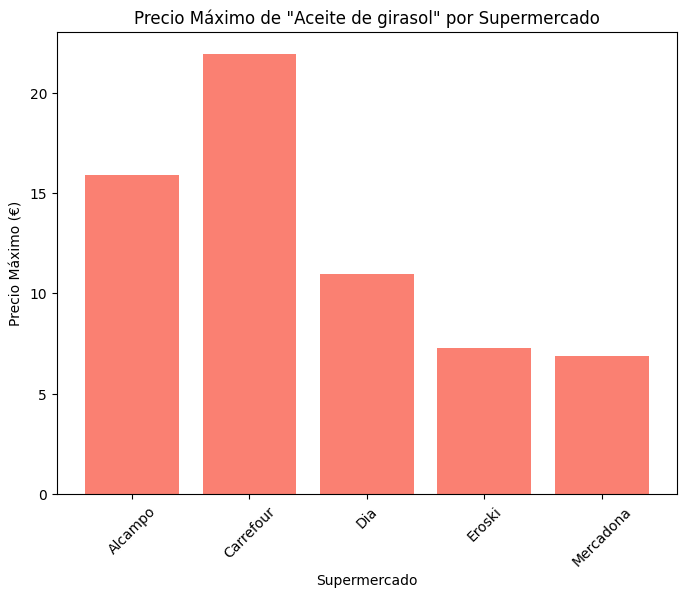

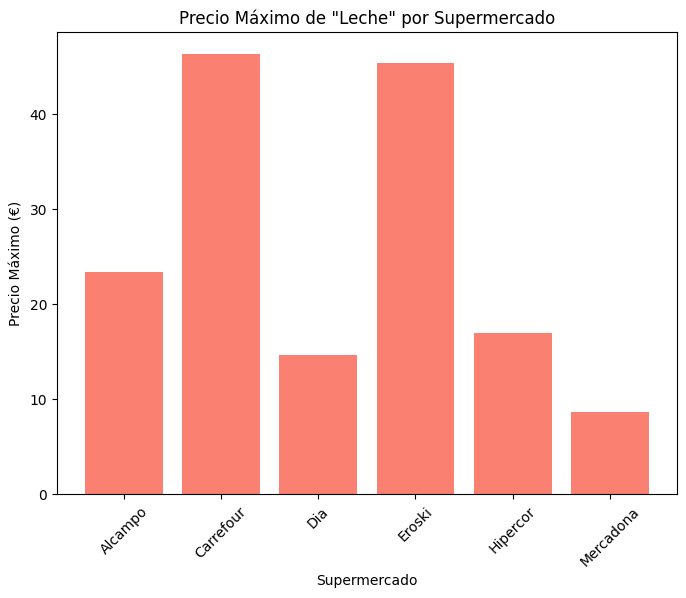

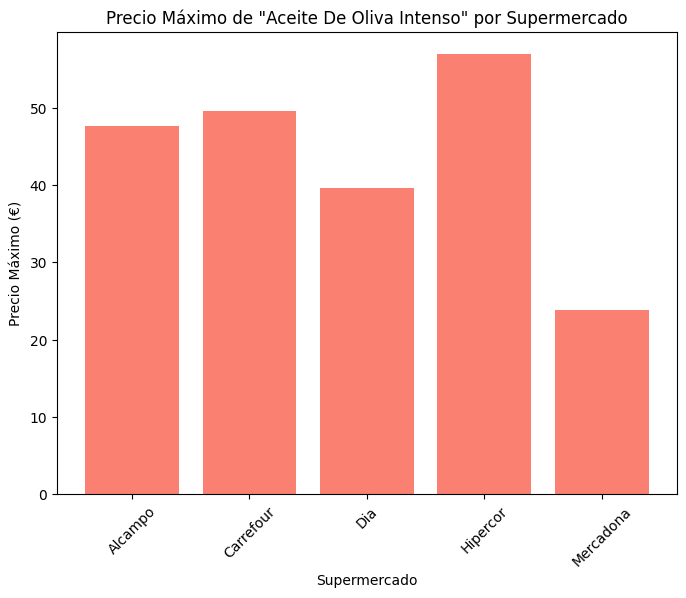

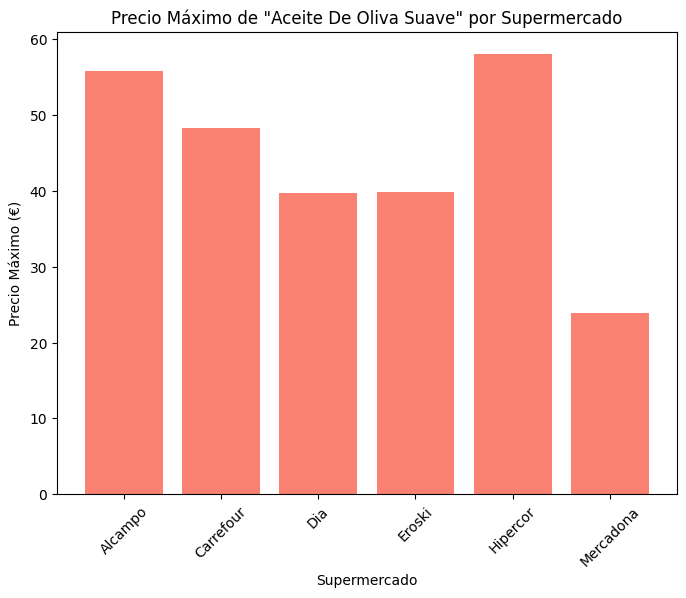

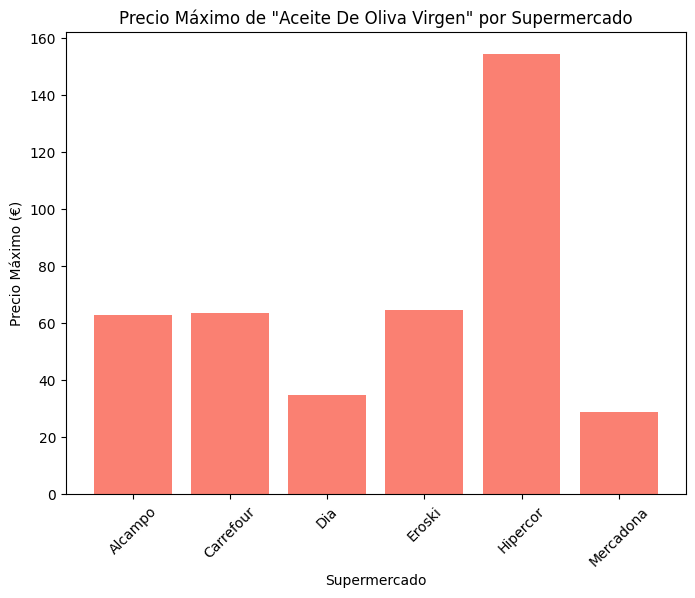

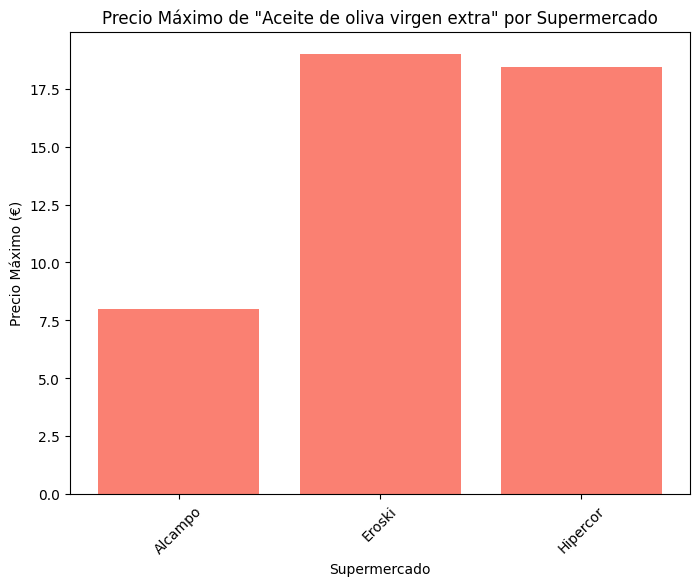

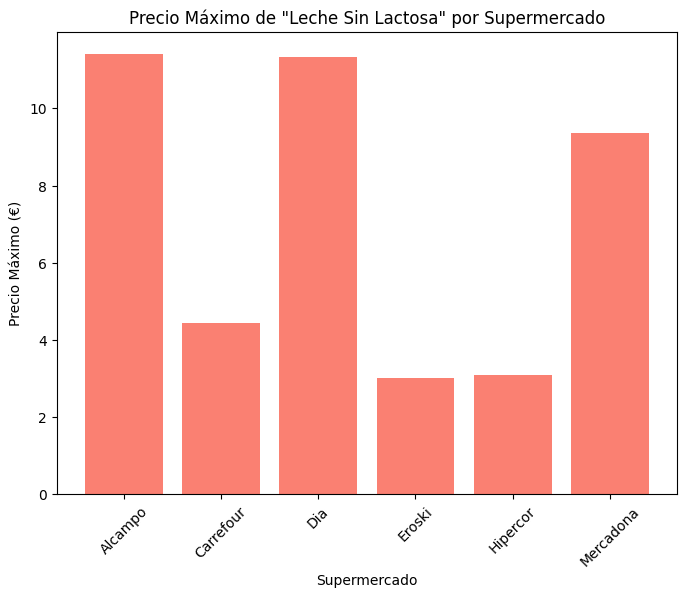

In [11]:
# 7. Precios máximos por supermercado
# Calcular el precio máximo por cada combinación de 'Tipo producto' y 'Supermercado'
precio_maximo_tipo_supermercado = data.groupby(['Tipo producto', 'Supermercado'])['Precio (€)'].max().reset_index()
precio_maximo_tipo_supermercado.columns = ['Tipo producto', 'Supermercado', 'Precio Máximo']

# Lista de tipos de producto únicos en los datos
tipos_producto = data['Tipo producto'].unique()

# Crear un gráfico para cada tipo de producto mostrando el precio máximo por supermercado
for tipo in tipos_producto:
    # Filtrar los datos para el tipo de producto actual
    datos_tipo = precio_maximo_tipo_supermercado[precio_maximo_tipo_supermercado['Tipo producto'] == tipo]
    
    # Generar el gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(datos_tipo['Supermercado'], datos_tipo['Precio Máximo'], color='salmon')
    plt.xlabel('Supermercado')
    plt.ylabel('Precio Máximo (€)')
    plt.title(f'Precio Máximo de "{tipo}" por Supermercado')
    plt.xticks(rotation=45)
    plt.show()


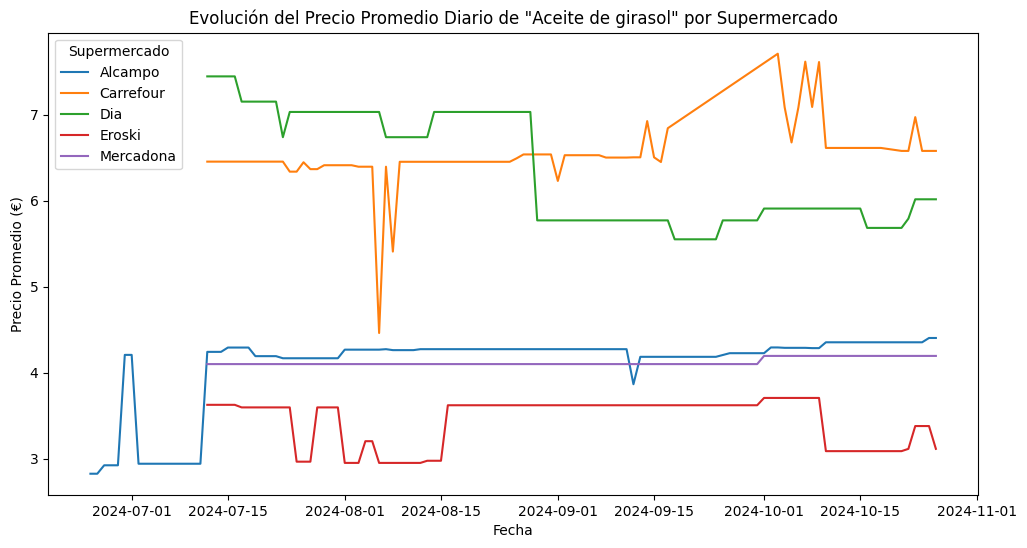

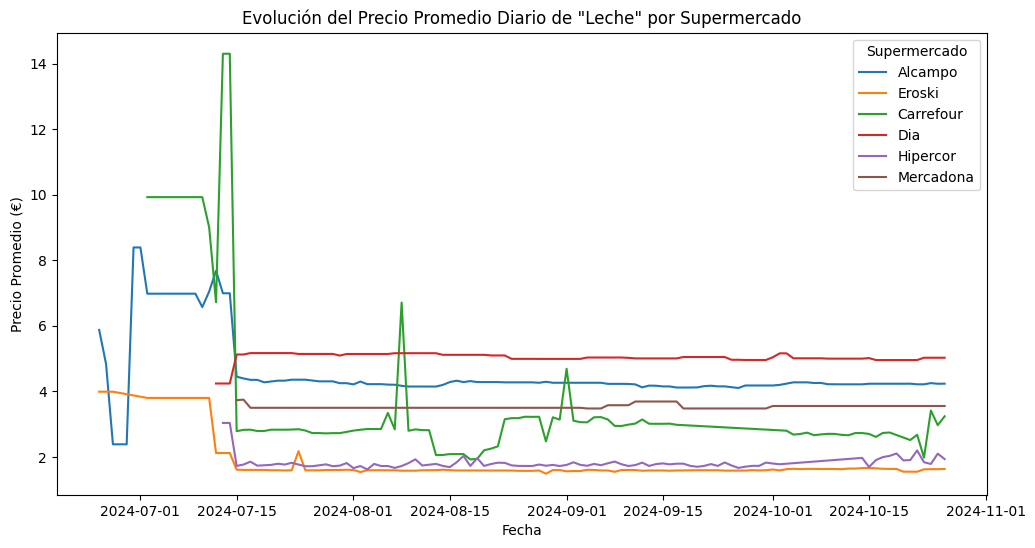

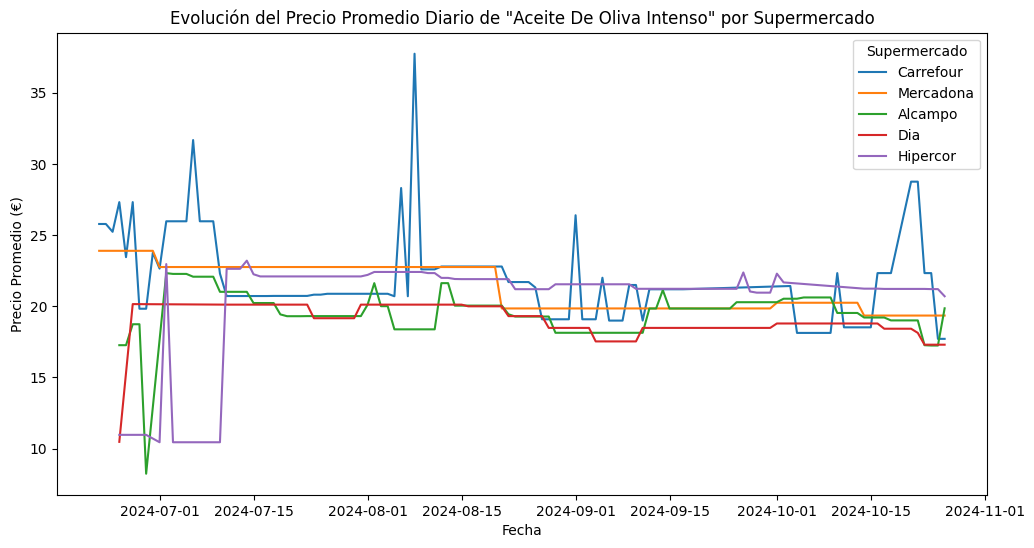

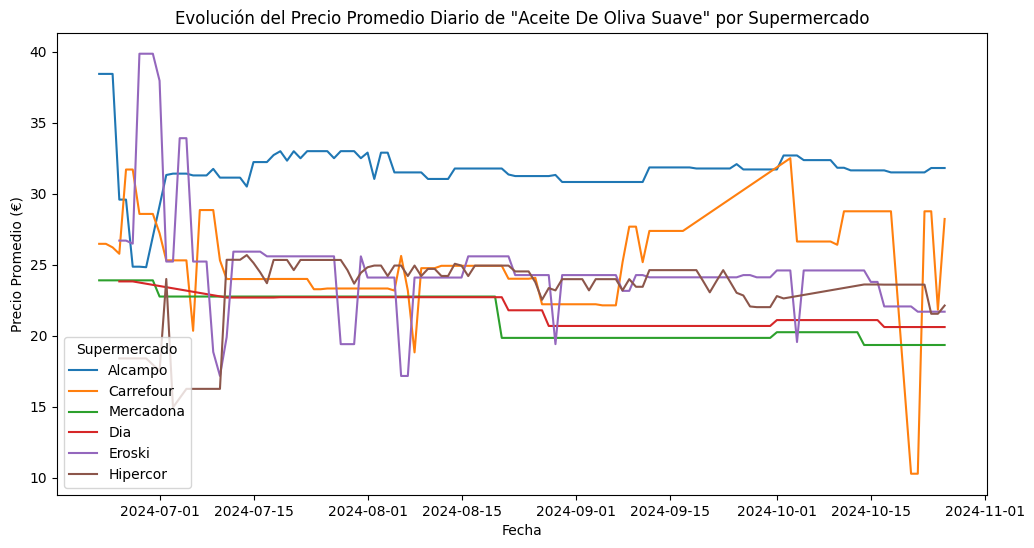

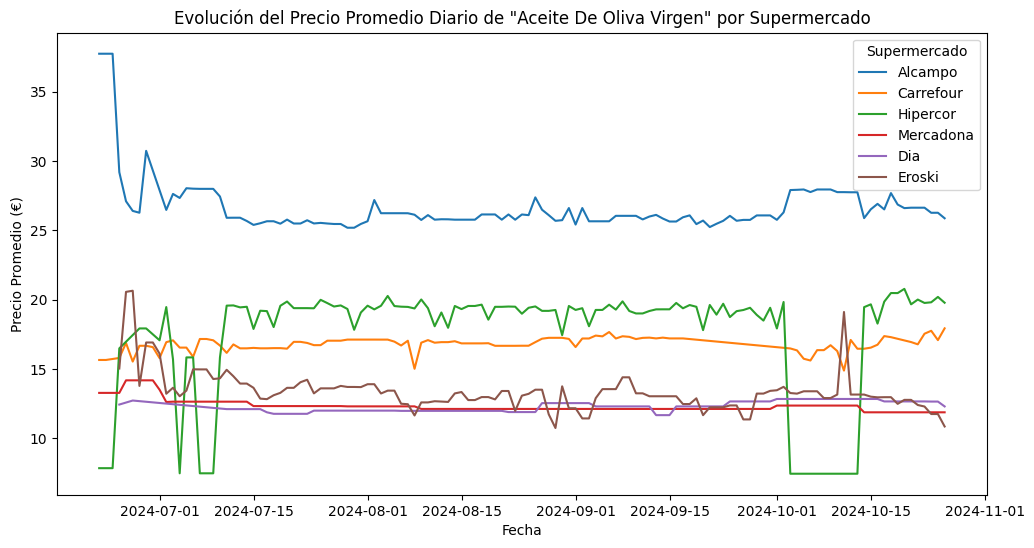

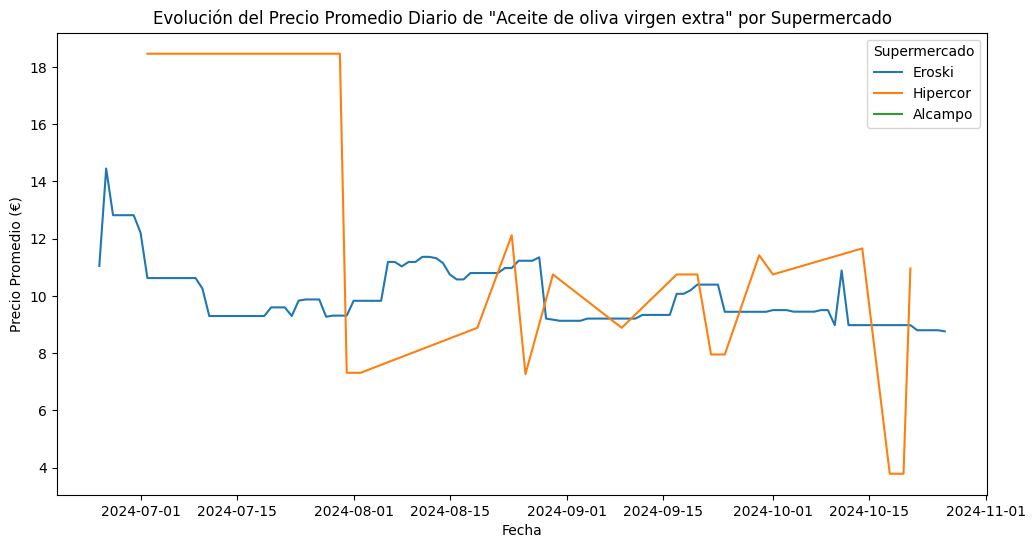

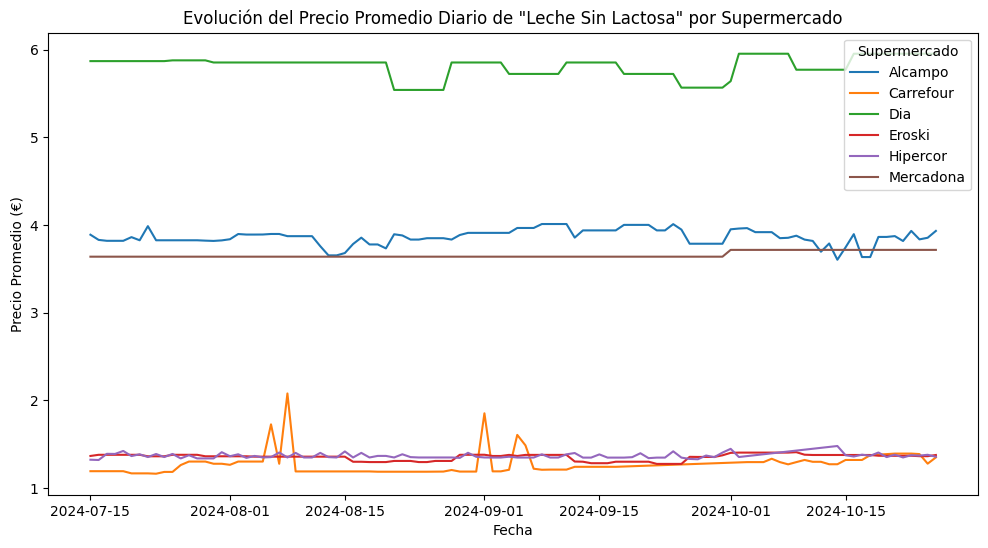

In [12]:
# 8.Evolución del Precio Promedio Diario de tipo de producto por Supermercado
# Calcular el precio promedio diario para cada combinación de 'Día', 'Supermercado' y 'Tipo producto'
promedio_precio_diario = data.groupby(['Día', 'Supermercado', 'Tipo producto'])['Precio (€)'].mean().reset_index()

# Lista de tipos de producto únicos en los datos
tipos_producto = data['Tipo producto'].unique()

# Crear un gráfico para cada tipo de producto mostrando la evolución del precio promedio diario por supermercado
for tipo in tipos_producto:
    # Filtrar los datos para el tipo de producto actual
    datos_tipo = promedio_precio_diario[promedio_precio_diario['Tipo producto'] == tipo]
    
    # Generar el gráfico de líneas
    plt.figure(figsize=(12, 6))
    for supermercado in datos_tipo['Supermercado'].unique():
        datos_supermercado = datos_tipo[datos_tipo['Supermercado'] == supermercado]
        plt.plot(datos_supermercado['Día'], datos_supermercado['Precio (€)'], label=supermercado)
    
    plt.xlabel('Fecha')
    plt.ylabel('Precio Promedio (€)')
    plt.title(f'Evolución del Precio Promedio Diario de "{tipo}" por Supermercado')
    plt.legend(title='Supermercado')
    plt.show()
